In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [5]:
# Setting base path
#ROOT_PATH = os.path.join(os.getcwd(), 'Dataset_csv')
#CBISDDSM_csvPATH = os.path.join('CBISDDSM')
#MIAS_PATH = os.path.join(ROOT_PATH, 'MIAS')

# Load Dataframe from .csv
calc_train = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_test = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_train = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
mass_test = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

In [6]:
#calc_case cropped image path 설정
dcm_image = calc_train['ROI mask file path'].to_list()

dcm_image[:5]

['Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/000000.dcm',
 'Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.67512362210319636108148504382680781938/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/000000.dcm',
 'Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.241202057913673145232234613012384759880/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/000000.dcm',
 'Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.314250272911170289203882349024229868823/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/000000.dcm',
 'Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.336811694512764490002272925921108351157/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/000000.dcm']

In [4]:
DDSM_dataPATH = './CBIS-DDSM'
images_dir=[]
    
for i in range(len(dcm_image)):
    images_dir.append(os.path.join(DDSM_dataPATH, dcm_image[i]).replace('\n', '').replace('\r', ''))
    
    
images=[]
for i in range(len(images_dir)):
    try:
        d=dicom.read_file(images_dir[i],force=True)
        #d = dicom.dcmread(images_dir[i])
        image=d.pixel_array
        image_small = skimage.transform.resize(image, (224,224), preserve_range=True)
        images.append(image_small)
    except Exception:
        print(i)
        print("error")
            
np.save('calc_train.npy',images)

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#images=np.load('train.npy')


X=np.stack(images)[...,None]
X=np.repeat(X,3,axis=-1)
#X=(X-np.mean(X))/np.std(X) #standardization
#X=(X-np.min(X))/(np.max(X)-np.min(X)) #normalization

X=X[1:]

Using TensorFlow backend.


In [6]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
    #img = rgb2gray(img)
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

In [7]:
X_no_hist=histogram_equalize(X)

In [8]:
X_hist=[]
for i in range(len(X)):
    img=histogram_equalize(X[i])
    X_hist.append(img)

C:\Users\User\Anaconda3\envs\keras\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


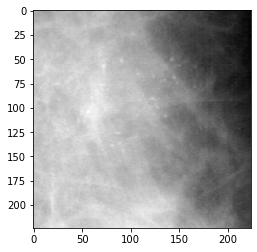

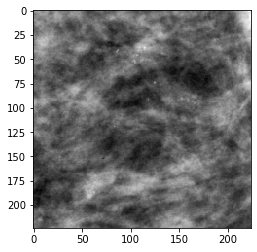

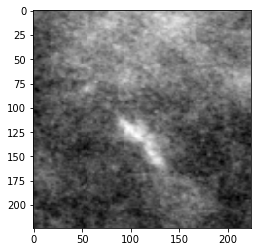

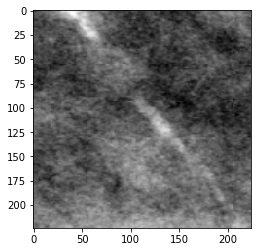

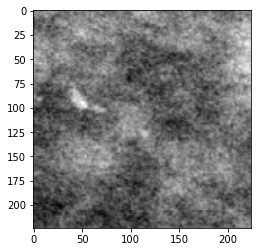

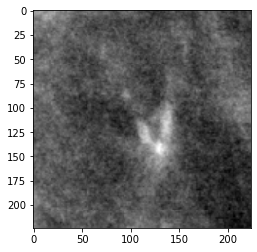

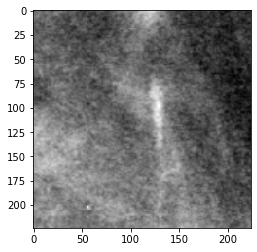

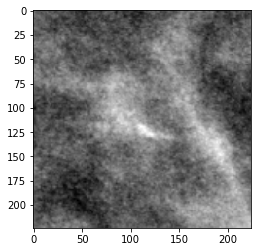

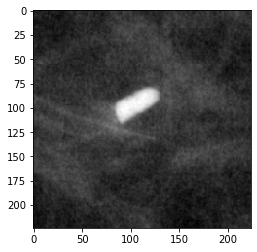

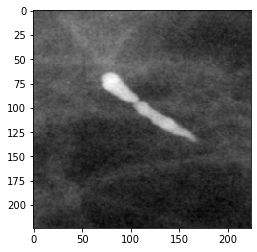

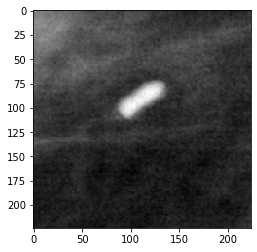

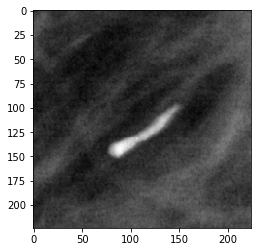

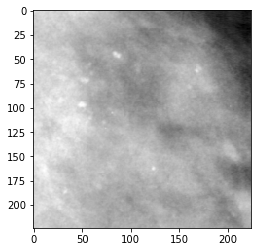

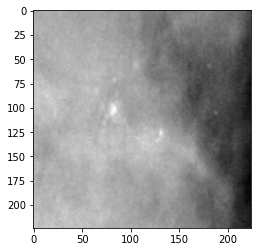

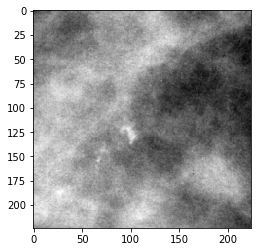

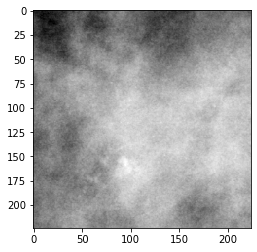

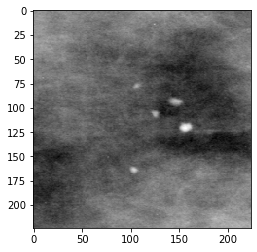

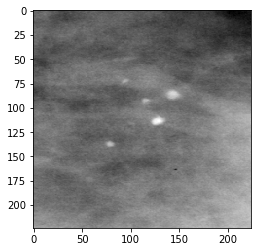

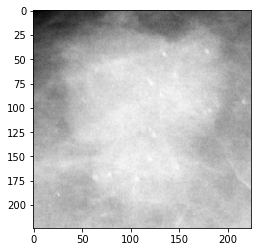

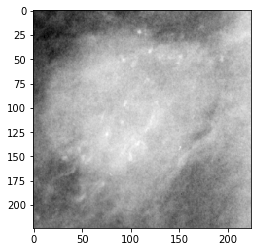

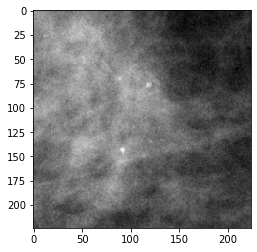

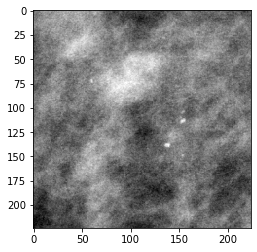

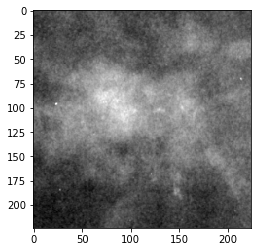

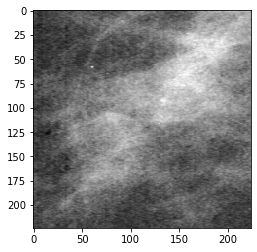

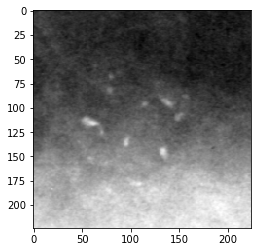

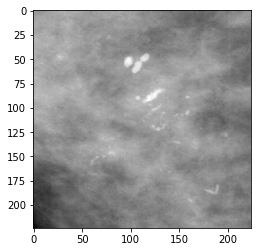

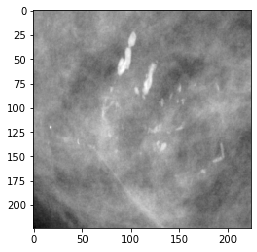

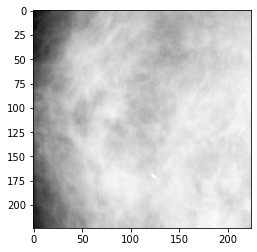

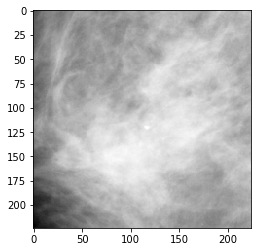

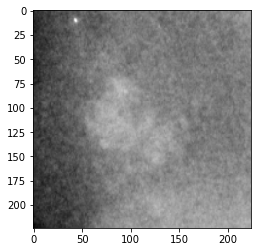

In [9]:
for i in range(30):
    plt.imshow(images[i+50],cmap='gray')
    plt.show()

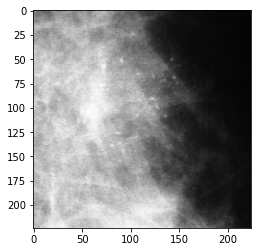

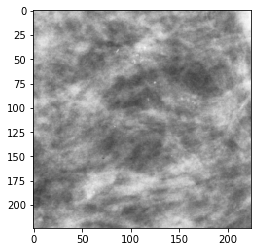

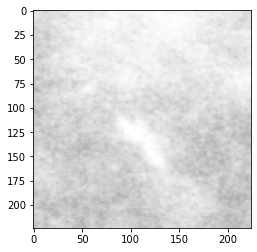

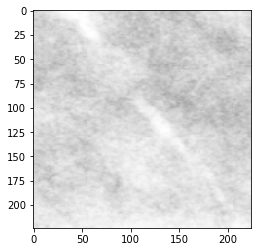

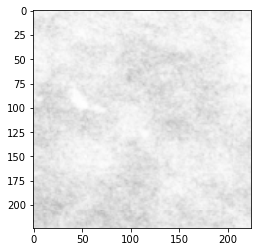

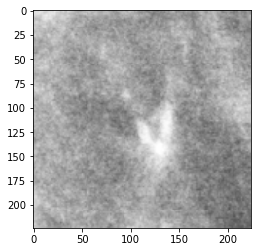

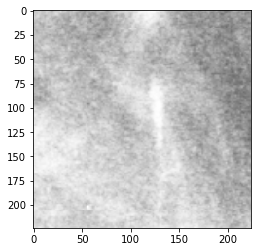

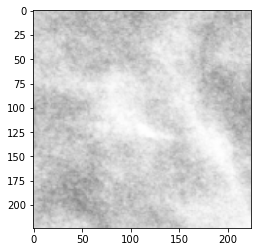

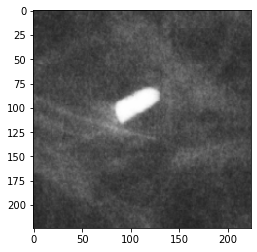

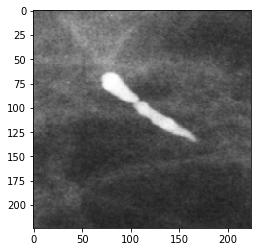

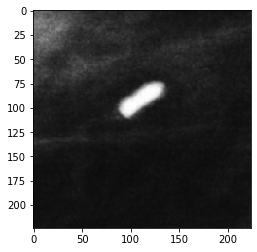

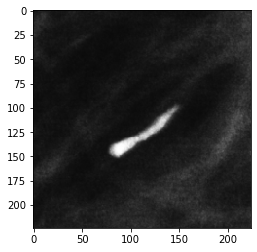

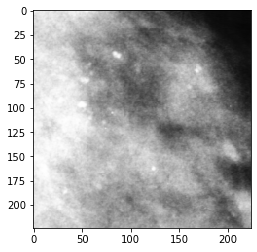

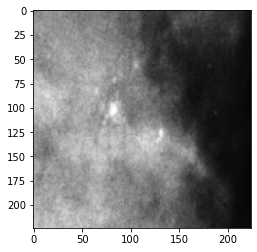

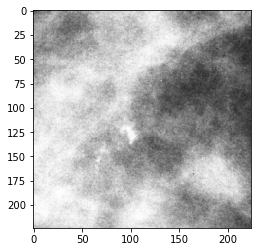

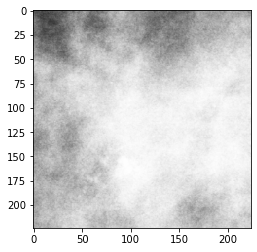

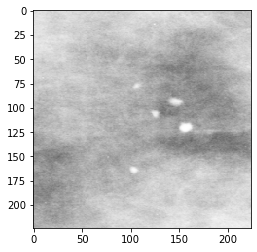

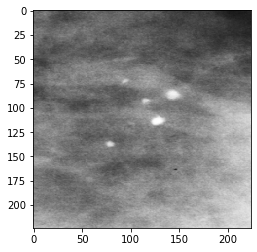

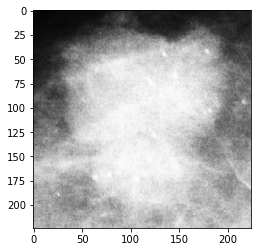

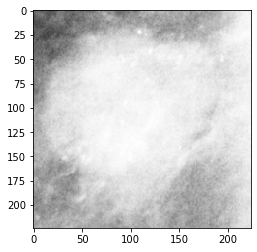

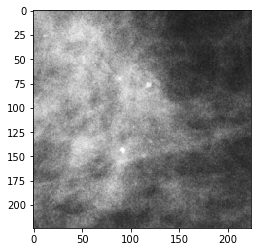

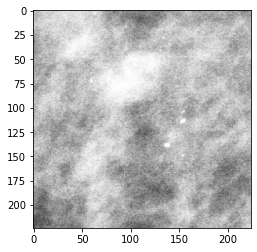

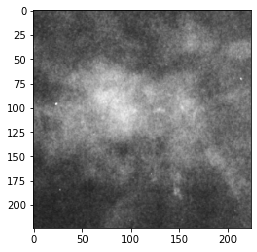

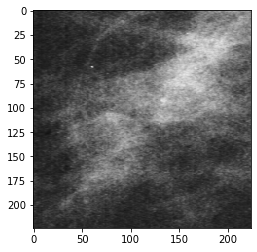

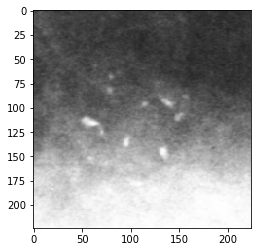

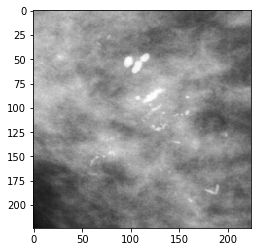

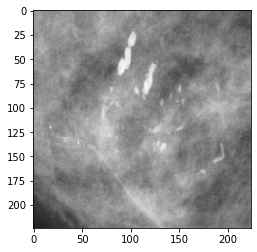

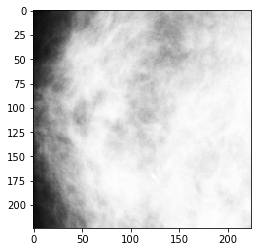

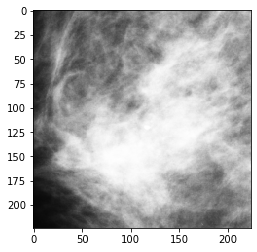

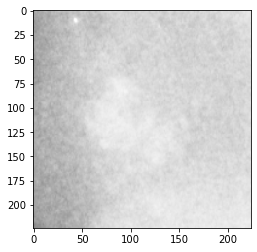

In [10]:
for i in range(30):
    plt.imshow(X_no_hist[i+49])
    plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

y=calc_train['pathology']
y=y[1:]
y[y == 'calc_BENIGN_WITHOUT_CALLBACK'] = "calc_BENIGN"
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
one_hot_y = np_utils.to_categorical(encoded_Y)

y=one_hot_y #BENIGN, BENIGN_WITHOUT_CALLBACK,MALIGNANT순

Using TensorFlow backend.


In [10]:
np.save('calc_data_X.npy',X_no_hist)
np.save('calc_data_y.npy',y)